In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns',500)

In [2]:
path = '../data/other/'
train_val = pd.read_csv(path+'sales_train_validation.csv.zip')
calendar = pd.read_csv(path+'calendar.csv')
sell_price = pd.read_csv(path+'sell_prices.csv.zip')


In [5]:
train_val.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,...,d_1664,d_1665,d_1666,d_1667,d_1668,d_1669,d_1670,d_1671,d_1672,d_1673,d_1674,d_1675,d_1676,d_1677,d_1678,d_1679,d_1680,d_1681,d_1682,d_1683,d_1684,d_1685,d_1686,d_1687,d_1688,d_1689,d_1690,d_1691,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,2,0,2,2,0,0,0,1,1,0,2,0,1,1,2,0,1,0,0,0,2,1,0,1,1,2,0,0,0,0,0,0,0,1,0,1,0,1,0,3,1,1,0,1,1,2,0,0,0,0,1,1,0,0,0,0,3,0,1,0,0,0,0,1,1,1,0,1,0,2,0,0,0,0,2,0,0,0,0,1,1,2,0,0,0,0,2,0,0,1,1,1,1,0,0,0,0,0,1,2,2,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,3,0,1,2,1,0,3,0,0,0,1,0,2,2,1,0,0,1,2,0,1

In [24]:
sell_price['item_id'].unique()

array(['HOBBIES_1_001', 'HOBBIES_1_002', 'HOBBIES_1_003', ...,
       'FOODS_3_825', 'FOODS_3_826', 'FOODS_3_827'], dtype=object)

No handles with labels found to put in legend.


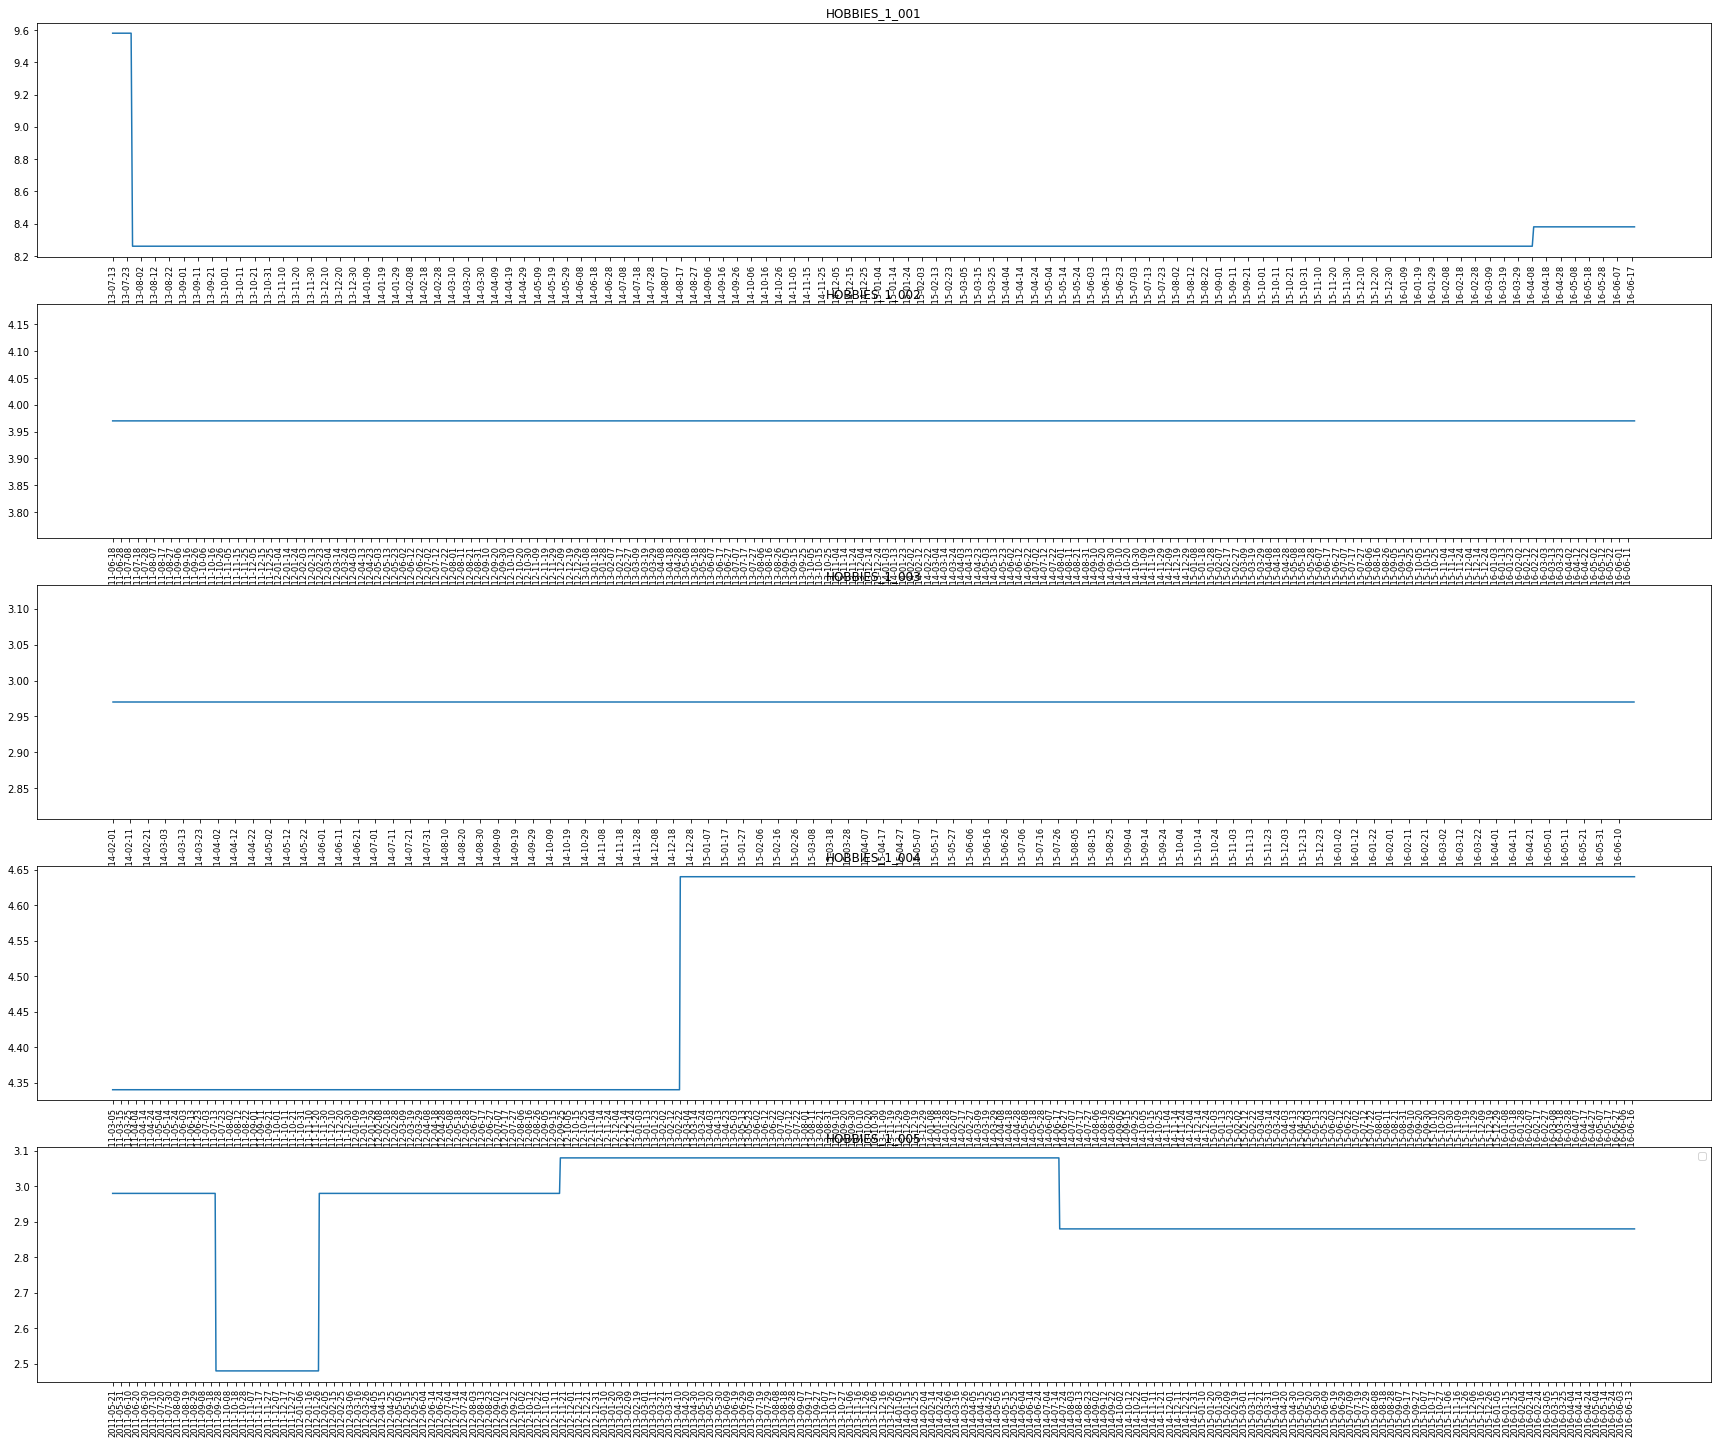

In [63]:
N = 5
plt.figure(figsize=(30,5*N))
for i,item_id in enumerate(cal_price['item_id'].unique()[:N]):
    plt.subplot(5,1,i+1)
    y = cal_price[(cal_price['item_id'] == item_id)& (cal_price['store_id'] == 'CA_1')]['sell_price']
    x = cal_price[(cal_price['item_id'] == item_id) & (cal_price['store_id'] == 'CA_1')]['date']
    plt.plot(x,y)
    dt_labels = x
    plt.xticks(x[::10], dt_labels[::10], rotation=90, size='small')
    plt.title(item_id)
plt.legend()
plt.show()

In [66]:
cal_price[(cal_price['item_id'] == 'HOBBIES_1_004')& (cal_price['store_id'] == 'CA_1')]['sell_price']

3772    4.34
3773    4.34
3774    4.34
3775    4.34
3776    4.34
        ... 
5701    4.64
5702    4.64
5703    4.64
5704    4.64
5705    4.64
Name: sell_price, Length: 1934, dtype: float64

In [69]:
cal_price[(cal_price['item_id'] == 'HOBBIES_1_004')& (cal_price['store_id'] == 'CA_1') & (cal_price['date'] >= '2013-02-01') & (cal_price['date'] <= '2013-03-01')]

,store_id,item_id,wm_yr_wk,sell_price,date,weekday
4471,CA_1,HOBBIES_1_004,11301,4.34,2013-02-01,Friday
4472,CA_1,HOBBIES_1_004,11302,4.34,2013-02-02,Saturday
4473,CA_1,HOBBIES_1_004,11302,4.34,2013-02-03,Sunday
4474,CA_1,HOBBIES_1_004,11302,4.34,2013-02-04,Monday
4475,CA_1,HOBBIES_1_004,11302,4.34,2013-02-05,Tuesday
4476,CA_1,HOBBIES_1_004,11302,4.34,2013-02-06,Wednesday
4477,CA_1,HOBBIES_1_004,11302,4.34,2013-02-07,Thursday
4478,CA_1,HOBBIES_1_004,11302,4.34,2013-02-08,Friday
4479,CA_1,HOBBIES_1_004,11303,4.34,2013-02-09,Saturday
4480,CA_1,HOBBIES_1_004,11303,4.34,2013-02-10,Sunday


In [70]:
calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [77]:
train_val[(train_val['item_id'] == 'HOBBIES_1_004') & (train_val['store_id'] == 'CA_1')][d_col]

,d_735,d_736,d_737,d_738,d_739,d_740,d_741,d_742,d_743,d_744,d_745,d_746,d_747,d_748,d_749,d_750,d_751,d_752,d_753,d_754,d_755,d_756,d_757,d_758,d_759,d_760,d_761,d_762,d_763
3,0,2,1,0,3,0,2,3,1,2,1,1,1,0,1,2,0,1,0,3,1,0,2,1,2,6,0,1,1


In [79]:
calendar[(calendar['date'] >= '2013-02-01') & (calendar['date'] <= '2013-03-01')]

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
734,2013-02-01,11301,Friday,7,2,2013,d_735,NaN,NaN,NaN,NaN,1,1,0
735,2013-02-02,11302,Saturday,1,2,2013,d_736,NaN,NaN,NaN,NaN,1,0,1
736,2013-02-03,11302,Sunday,2,2,2013,d_737,SuperBowl,Sporting,NaN,NaN,1,1,1
737,2013-02-04,11302,Monday,3,2,2013,d_738,NaN,NaN,NaN,NaN,1,0,0
738,2013-02-05,11302,Tuesday,4,2,2013,d_739,NaN,NaN,NaN,NaN,1,1,1
739,2013-02-06,11302,Wednesday,5,2,2013,d_740,NaN,NaN,NaN,NaN,1,1,1
740,2013-02-07,11302,Thursday,6,2,2013,d_741,NaN,NaN,NaN,NaN,1,1,0
741,2013-02-08,11302,Friday,7,2,2013,d_742,NaN,NaN,NaN,NaN,1,0,1
742,2013-02-09,11303,Saturday,1,2,2013,d_743,NaN,NaN,NaN,NaN,1,1,1
743,2013-02-10,11303,Sunday,2,2,2013,d_744,NaN,NaN,NaN,NaN,1,0,0


In [1]:
import pandas as pd

In [6]:
train = pd.read_pickle('../features/Base_train.pkl')

In [10]:
train['date']

0           2011-01-29
1           2011-01-29
2           2011-01-29
3           2011-01-29
4           2011-01-29
               ...    
46027952    2016-04-24
46027953    2016-04-24
46027954    2016-04-24
46027955    2016-04-24
46027956    2016-04-24
Name: date, Length: 46027957, dtype: object

In [12]:
train[train['date'] >= '2015-03-24']

,id,item_id,dept_id,cat_id,store_id,state_id,demand,part,date,wm_yr_wk,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
33940051,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,1,train,2015-03-24,11508,NaN,NaN,NaN,NaN,0,0,0,8.257812
33940052,HOBBIES_1_002_CA_1_validation,1438,3,1,0,0,1,train,2015-03-24,11508,NaN,NaN,NaN,NaN,0,0,0,3.970703
33940053,HOBBIES_1_003_CA_1_validation,1439,3,1,0,0,0,train,2015-03-24,11508,NaN,NaN,NaN,NaN,0,0,0,2.970703
33940054,HOBBIES_1_004_CA_1_validation,1440,3,1,0,0,0,train,2015-03-24,11508,NaN,NaN,NaN,NaN,0,0,0,4.640625
33940055,HOBBIES_1_005_CA_1_validation,1441,3,1,0,0,1,train,2015-03-24,11508,NaN,NaN,NaN,NaN,0,0,0,2.880859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46027952,FOODS_3_823_WI_3_validation,1432,2,0,9,2,1,train,2016-04-24,11613,NaN,NaN,NaN,NaN,0,0,0,2.980469
46027953,FOODS_3_824_WI_3_validation,1433,2,0,9,2,0,train,2016-04-24,11613,NaN,NaN,NaN,NaN,0,0,0,2.480469
46027954,FOODS_3_825_WI_3_validation,1434,2,0,9,2,0,train,2016-04-24,11613,NaN,NaN,NaN,NaN,0,0,0,3.980469
46027955,FOODS_3_826_WI_3_validation,1435,2,0,9,2,3,train,2016-04-24,11613,NaN,NaN,NaN,NaN,0,0,0,1.280273
